# <font color=blue> **Food Image Classifier** </font>

In this notebook an image classifier distinguishing between 5 different types of food is developed from start to finish. The development proceeds in 5 different steps and each step is thorougly explained and accompanied with the corresponding code. 

The goal of the classifier is to correctly distinguish the following food categories:

- risotto
- steak
- mac n' cheese
- burger
- sushi

Development is executed in 5 steps:

1. Creating an imageset
2. View data
3. Train model
4. Results interpretation and error analysis
5. Cleaning up the dataset

Throughout the design, the fastai library will be used.


In [1]:
%reload_ext autoreload
%autoreload
%matplotlib inline

from fastai.vision import *

## 1. Creating a dataset 

In order to create an image classifier, an imageset is required. So the first step towards building an image classifier is to find the desired images and label them. 

To do that, we will be using the [google_images_download package](https://github.com/hardikvasa/google-images-download).

The images will be stores in the folder "images" and each category shall have a separate subfolder. This will help us label the images easily later. To download the images using google_images_download, a set of arguments has to be defined. This is done in the cells below. For every category, 100 medium-sized jpg images will be downloaded. Should the user desire more than 100 images, the chromedriver extension is required and the path to it has to be passed on as an argument. To ease the readability of this notebook, silent_mode has been activated to avoid printing the urls.

In [2]:
classes = ['risotto','steak','burger','macncheese','sushi']

In [3]:
%%capture
path = Path('data')

folder = 'train/risotto'
file = 'urls_risotto.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

if not os.listdir(dest):
    download_images(path/file, dest, max_pics=500)

folder = 'train/steak'
file = 'urls_steak.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

if not os.listdir(dest):
    download_images(path/file, dest, max_pics=500)

folder = 'train/burger'
file = 'urls_burger.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

if not os.listdir(dest):
    download_images(path/file, dest, max_pics=500)

folder = 'train/macncheese'
file = 'urls_macncheese.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

if not os.listdir(dest):
    download_images(path/file, dest, max_pics=500)

folder = 'train/sushi'
file = 'urls_sushi.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

if not os.listdir(dest):
    download_images(path/file, dest, max_pics=500)

In [4]:
for c in classes:
    print(c)
    verify_images(path/'train'/c, delete=True, max_size=500)

risotto


steak


burger


macncheese


sushi


In [5]:
for folder in classes:
    dest = path/'test'/folder
    dest.mkdir(parents=True, exist_ok=True)

    files = os.listdir(path/"train"/folder)
    
    if not os.listdir(path/'test'/folder):
    
        test_size = int(len(files)/5)
        indices = random.sample( range(len(files)),test_size)
        chosen_files = [files[i] for i in indices ]
        chosen_files_paths = [path/'train'/folder/file for file in chosen_files]
        
        for curr_path in chosen_files_paths:
            shutil.move(str(curr_path),str(dest))


In [12]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path,
                                  train = "train",
                                  test  = "test",
                                  valid_pct = 0.25,
                                  ds_tfms = get_transforms(),
                                  size = 224,
                                  bs = 64,
                                  num_workers = 4).normalize(imagenet_stats)

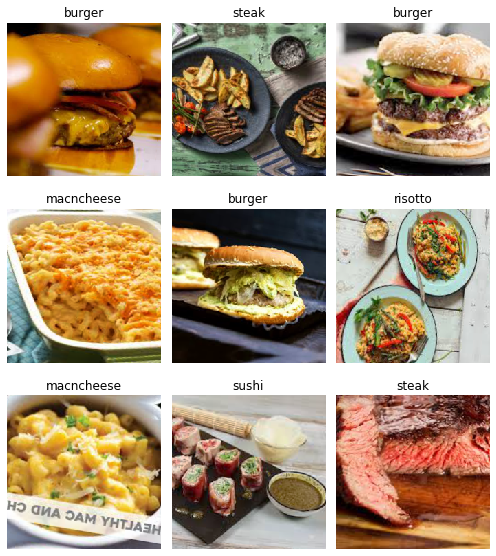

In [10]:
data.show_batch(rows=3, figsize=(7,8))

## 3. Train model

In [ ]:
learn_res = cnn_learner(data, models.resnet34, metrics = accuracy)
learn_alex = cnn_learner(data, models.alexnet,  metrics = accuracy)

In [ ]:
learn_res.fit_one_cycle(6)
learn_alex.fit_one_cycle(6)

In [ ]:
learn_res.save('stage-1')
learn_alex.save('stage-1')


In [ ]:
learn_res.unfreeze()
learn_alex.unfreeze()

In [ ]:
learn_res.lr_find()
learn_res.recorder.plot()

In [ ]:
learn_res.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn_alex.lr_find()
learn_alex.recorder.plot()

In [ ]:
learn_alex.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn_res.save('stage-2')
learn_alex.save('stage-2')

## 4. Interpretation & Error Analysis



In [ ]:
learn_res.load('stage-2');
learn_alex.load('stage-2');

interp_res = ClassificationInterpretation.from_learner(learn_res)
interp_alex = ClassificationInterpretation.from_learner(learn_alex)

In [ ]:
interp_res.plot_confusion_matrix()

In [ ]:
interp_alex.plot_confusion_matrix()